<a href="https://colab.research.google.com/github/TianaGabel/C-2025/blob/main/DataWranglingFinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Grant funding trends at CSU
**Author:** Tatiana Gabel

**Overview:** This project investigates new university grant funding at csu.

### **Background:**
Universities receive a variety of external funding to support research, programs, employee costs, development projects among other initiatives. This support comes in the form of grants, cooperative agreements, contracts, etc. Which are collectively known as sponsored programs/projects. In order to receive funding Primary investigators(PIs) submit proposals to outside organizations such as federal agencies, corporations, non-profits or foundations. CSU is considered an R1 institution, which means that //. Hence, the funding for sponsored projects is essential for csu to stay competitive.

For this project, I will be narrowing my scope to Grants awarded by federal agencies.
- I have opted to focus on grants instead of cooperative agreements as in cooperative agreements federal employees worked directly with the project, rather than monitoring performance at specific deadlines.
- I chose federal agencies as historically they were the largest sponsors of academic research. However, as of 2025 the current poltical climate poses the threat of funding cuts and freezes which could significantly impact CSU.

Additionally, to further narrow the scope of data used only grants above 1,000 dollars between the years of 2016-2024 were used.

I will refer to grants with a start date within the specified year as "New" grants, even if the grant is for additional funding of a previous grant.

### **Datasets:**
**Office of sponsored projects University grant data**


Link: https://vprweb.research.colostate.edu/Proposal-Award-History-Search/Award.aspx

Description:
Contains the fields
- Principal investigator
- PI title
- Account Number
- Amount Obligated
- Start Date
- End Date
- Grant Title
- Transaction Type (Language has been altered each year. 2024 descriptions are much more concise and non-descriptive)
- College/Department
- Sponsor Agency

**CSU Faculty Credentials**

Link: https://app.powerbi.com/view?r=eyJrIjoiNTNiOTg2YzktNzg3MS00YjY4LTk1MDAtZmZjM2EzMjhjNGFiIiwidCI6ImFmYjU4ODAyLWZmN2EtNGJiMS1hYjIxLTM2N2ZmMmVjZmM4YiIsImMiOjZ9

Description:
Information on basic faculty credentials, most PIs are also faculty which allows the above dataset to be merged on the name field.
Contains the fields
- Name
- Department/Division
- Rank/Seniority (ex: associate professor)
- Tenured Status
- Highest Degree earned
 - Major
 - Year
 - University

**CSU Faculty Citation Counts**

//TODO
Link:

Description:
The H-index provides a mesure of the number of research papers that have been citated more than 10 times, indicating their work has been meaningful to research.

### **Methodology:**
1. **Data Exploration:**
My initial exploration of the data was looking for a meaningful way to reduce the scope of the project. Based on the 2024 data nearly half of listed sponsored program transactions were for grants, it was not uncommon for multiple grants to be received for the same project(same account number), nor for a PI to have multiple projects that received funding. Around half of grants lasted less than 2 years, and around another 40% lasted between 2 to 6 years. There is a peak in funding in September and December, potentially correlating with the start of the college semester, or with company budgeting quarters
3. **Cleaning Data:**


# Import and Data Cleaning

In [3]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

grant_data = {}
for year in range(2016,2025):
  file_name = f"FederalGrantFunding{year}.xlsx"
  df = pd.read_excel(file_name, header=0)
  grant_data[year] = df

sponsored_programs_all_2024 = pd.read_excel("AllAwards2024.xlsx")
faculty_credentials = pd.read_excel("Faculty-Credentials.xlsx")

In [4]:
sponsored_programs_all_2024.head()

,Principal Investigator,Account Number,Obligated Amount,Transaction Date,Start Date,End Date,Title,Transaction Description,Award Type,Sponsor Type,College/Division,Email Address,Title.1,ENAME,Sponsor Name
0,"Gray,Caroline Porter",5340928.0,1000.0,2024-07-22 10:36:34,2024-06-30 18:00:00,2025-06-29 18:00:00,Variety Development for the National Chip Proc...,5340928 initial funds,Grant,Domestic Commercial,Agric Sciences-Agric Experiment Station,Caroline.Gray@colostate.edu,Sr Research Associate,cpgray,Potatoes USA
1,"Rocca,Jorge G",5350628.0,1014.0,2024-09-12 10:42:18,2024-05-22 18:00:00,2024-06-14 18:00:00,2024 LaserNet US Strategic Planning Meeting,5350628 initial funds,Contract,Other Domestic Higher Education,"Engineering, Walter Scott, Jr. (SCOE)",Jorge.Rocca@ColoState.EDU,Professor,rocca,SLAC National Accelerator Laboratory
2,"Nishimura,Erin Asayo",5320478.0,1080.0,2024-06-13 09:52:48,2024-01-31 17:00:00,2026-01-30 17:00:00,Naly Torres: Mechanisms Directing Translating ...,5320478 add funds per revised award,Grant,Federal,Natural Sciences,Erin.Nishimura@colostate.edu,Associate Professor,erinnish,HHS-NIH-National Institutes of Health
3,"Montgomery,Taiowa",5320465.0,1259.0,2024-02-23 01:49:19,2024-01-30 17:00:00,2024-07-30 18:00:00,Todos Santos Small RNA Meeting Support,5320465 initial funds,Grant,Foreign Non-Profit (other than Foreign Foundat...,Natural Sciences,Tai.Montgomery@colostate.edu,Associate Professor,tmontgom,The Company of Biologists
4,"Miller,Steven D",5303219.0,1383.0,2024-09-09 04:11:56,2024-06-30 18:00:00,2029-06-29 18:00:00,Task 1: Cooperative Institute for Research in ...,5303219 MOD 21 Funds,Cooperative Agreement,Federal,"Engineering, Walter Scott, Jr. (SCOE)",Steven.Miller@colostate.edu,Professor,sdmill72,DOC-NOAA-Natl Oceanic and Atmospheric Admn


# RQ 1: What does sponsored project funding look like at CSU?
- Types of funding percentages
- Grant Cycle
- Funding amount by time of year
- Department funding (Trends in funding??)

In [52]:
# Pivot table of amount obligated by award type and sponsor type
# Credit to https://stackoverflow.com/questions/68668046/styling-pandas-pivot-table-with-multiple-columns for table styling
award_type_by_sponsor_type = pd.pivot_table(sponsored_programs_all_2024, values='Obligated Amount', columns='Award Type', index='Sponsor Type', aggfunc='sum', fill_value=0, margins=True,margins_name='Total_Awarded')
award_type_by_sponsor_type.style.format('${:,.0f}')

Award Type,Contract,Cooperative Agreement,Grant,IPA Agreement,Other,Total_Awarded
Sponsor Type,,,,,,
Colorado Higher Education - Private,"$115,000",$0,$0,$0,$0,"$115,000"
Domestic Commercial,"$5,141,979","$262,665","$6,847,666",$0,$0,"$12,252,310"
Domestic Foundations,"$4,866,029",$0,"$9,668,732",$0,"$123,024","$14,657,785"
Domestic Non-Profit (other than Domestic Foundations),"$3,363,424","$2,102,030","$4,754,822",$0,"$353,944","$10,574,220"
Federal,"$6,488,480","$88,404,726","$111,191,623","$1,592,412","$13,819,216","$221,496,456"
Foreign Commercial,"$452,647",$0,"$3,818,156",$0,$0,"$4,270,803"
Foreign Foundations,$0,$0,"$5,416,865",$0,"$41,724","$5,458,589"
Foreign Government,"$394,414",$0,$0,$0,$0,"$394,414"
Foreign Higher Education,$0,$0,"$221,540",$0,$0,"$221,540"


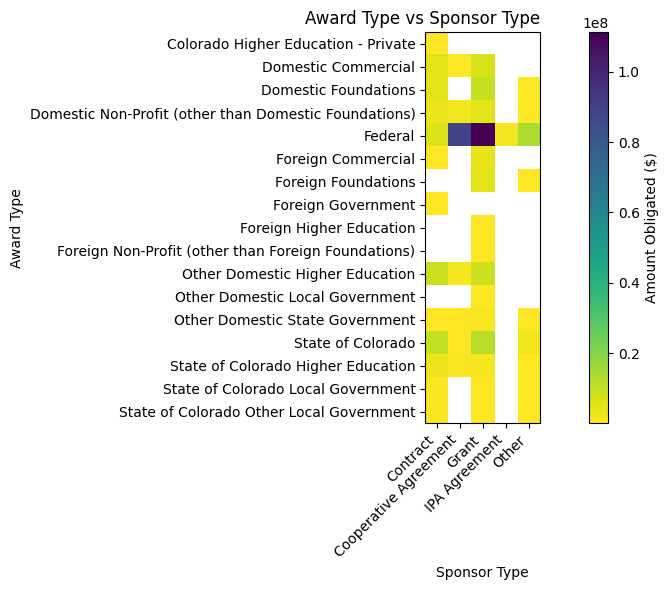

In [69]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
# Credit to "https://stackoverflow.com/questions/43943784/having-both-set-under-and-set-bad-working-in-matplotlib-contourf-plot" for how to update colormap

# New Table for graphing
award_type_by_sponsor_type = pd.pivot_table(sponsored_programs_all_2024, values='Obligated Amount', columns='Award Type', index='Sponsor Type', aggfunc='sum')
plt.figure(figsize=(10, 6))
colMap = cm.viridis_r
colMap.set_bad(color='white')
plt.imshow(award_type_by_sponsor_type, cmap=colMap)
plt.title("Award Type vs Sponsor Type",loc='right')
plt.xlabel("Sponsor Type")
plt.ylabel("Award Type")
plt.colorbar(label='Amount Obligated ($)')
plt.margins(0.1)

plt.xticks(ticks=range(len(award_type_by_sponsor_type.columns)), labels=award_type_by_sponsor_type.columns, rotation=45, ha='right')
plt.yticks(ticks=range(len(award_type_by_sponsor_type.index)), labels=award_type_by_sponsor_type.index)

plt.tight_layout()
plt.show()

Index(['Natural Resources-Academic Units',
       'Engineering, Walter Scott, Jr. (SCOE)',
       'Natural Resources-Colo State Forest Svc', 'Veterinary Medicine',
       'Natural Sciences', 'Agricultural Sciences-Academic Units',
       'VP Research', 'Health and Human Sciences',
       'Agric Sciences-Agric Experiment Station',
       'VP Engagement-CSU Extension', 'Liberal Arts',
       'Provost + Executive Vice President', 'VP Undergraduate Affairs',
       'VP Enrollment + Access', 'VP Engagement',
       'President's Office-Inclusive Excellence', 'International Programs',
       'VP Faculty Affairs', 'VP Student Affairs-Academic Support', 'SPUR',
       'VP University Operations', 'VP Student Affairs-Campus Life',
       'Libraries'],
      dtype='object', name='College/Division')


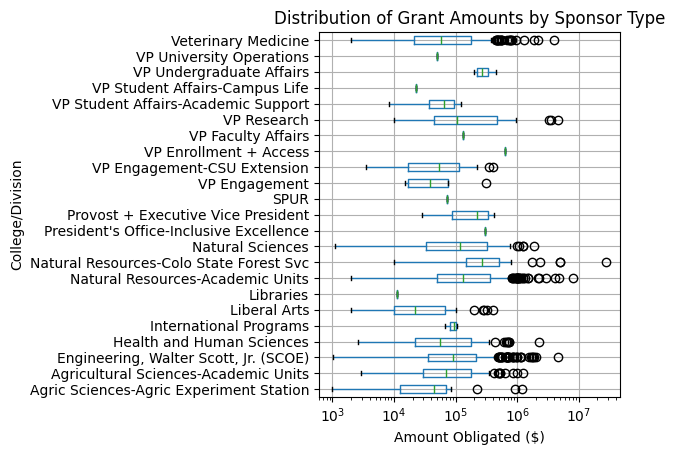

In [114]:
#TODO I would like to order the boxplots by either mean or most obligated
top_sponsors = sponsored_programs_all_2024.groupby('College/Division')['Obligated Amount'].sum().sort_values(ascending=False)
top_six = top_sponsors[:]
print(top_sponsors.index)
ax = sponsored_programs_all_2024[sponsored_programs_all_2024['College/Division'].isin(top_six.index)].boxplot(column='Obligated Amount', by='College/Division', vert=False)
ax.set_xscale('log')
plt.title("Distribution of Grant Amounts by Sponsor Type")
plt.suptitle("")
plt.xlabel("Amount Obligated ($)")
plt.tight_layout()
plt.show()

# RQ 2: How has Federal Grant funding changed over 2016-2024?

Vizualization 1
- Timeseries graph with number of awardees, projects and grants
Some tables with basic information
- Length of grants(Grant cycle)/other information from the general inquiry
- Stacked bar graph of most common federal agency funding.

-why the choice was made to do this
-code representation
-output graphs, what the results mean

# RQ 3: What does the typical profile of "high-performing" PIs look like?

- Pivot table based on the awardee granted the most money?
- Most projects
- Potentially information on H-index

- "Average" PI


# Conclusions